<a href="https://colab.research.google.com/github/Charan-077/21083133_project_football/blob/main/Project_football_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as foot_ba_pd_s
import numpy as foot_ba_np
import matplotlib.pyplot as foot_ba_ma_pt
import seaborn as foot_ba_sbn
import sqlite3 as foot_ba_ma_sqe
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
def tbs_in_sqe_foo(conn):
    foot_ba_ma_cur = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tbs_foo_ma = [
        v[0] for v in foot_ba_ma_cur.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    foot_ba_ma_cur.close()
    return tbs_foo_ma

In [3]:
sqlite3_conn = foot_ba_ma_sqe.connect('/content/drive/MyDrive/Database/database.sqlite')

In [4]:
tbs_foo_ma = tbs_in_sqe_foo(sqlite3_conn)

In [5]:
tbs_foo_ma

['betfront', 'football_data']

In [6]:
# Saving the raw data in a dictionary as pandas dataframes

foot_ba_dtc_ry = {}

for tble_foo_ma_s in tbs_foo_ma:
    foot_ba_dtc_ry[tble_foo_ma_s] = foot_ba_pd_s.read_sql_query("SELECT * FROM '{}'".format(tble_foo_ma_s), sqlite3_conn)

In [7]:
foot_ba = foot_ba_dtc_ry["football_data"]

In [8]:
foot_ba

,Season,Datetime,Div,Country,League,Referee,HomeTeam,AwayTeam,FTHG,FTAG,...,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH
0,2021,2021-05-31 23:00:00,ARG,Argentina,Primera Division,None,Independiente,Colon Santa FE,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021-05-31 19:00:00,ARG,Argentina,Primera Division,None,Racing Club,Boca Juniors,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021-05-31 02:30:00,USA,USA,MLS,None,Seattle Sounders,Austin FC,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2021,2021-05-31 02:15:00,MEX,Mexico,Liga MX,None,Cruz Azul,Santos Laguna,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021-05-31 00:30:00,BRA,Brazil,Serie A,None,Internacional,Sport Recife,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190668,2000/2001,2000-07-29 00:00:00,F2,France,Division 2,None,Ajaccio,Le Mans,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190669,2000/2001,2000-07-29 00:00:00,SC0,Scotland,Premier League,Willie Young,St Mirren,Kilmarnock,0,1,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.25,2.40
190670,2000/2001,2000-07-28 00:00:00,F1,France,Le Championnat,None,Paris SG,Strasbourg,3,1,...,NaN,NaN,NaN,NaN,6.5,NaN,NaN,NaN,3.70,1.40
190671,2000/2001,2000-07-28 00:00:00,F1,France,Le Championnat,None,Marseille,Troyes,3,1,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.50,1.45


In [9]:
foot_ba["Country_League"] = foot_ba["Country"] + "_" + foot_ba["League"]

In [10]:
foot_ba["Country_League"]

,Country_League
0,Argentina_Primera Division
1,Argentina_Primera Division
2,USA_MLS
3,Mexico_Liga MX
4,Brazil_Serie A
...,...
190668,France_Division 2
190669,Scotland_Premier League
190670,France_Le Championnat
190671,France_Le Championnat


In [11]:
foot_ba.shape

(190673, 173)

In [12]:
foot_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190673 entries, 0 to 190672
Columns: 173 entries, Season to Country_League
dtypes: float64(151), int64(4), object(18)
memory usage: 251.7+ MB


In [13]:
foot_ba.isnull().sum()

,0
Season,0
Datetime,0
Div,0
Country,0
League,0
...,...
WHCD,176267
WHCH,176267
WHD,43664
WHH,43664


In [14]:
def display_na_cols(df):
    with foot_ba_pd_s.option_context("display.min_rows", 50, "display.max_rows", 200, "display.max_columns", 5):
        display(df[df.columns[df.isna().any()]].isnull().sum())

In [15]:
# Create an id column tha represents the index from the very first dataset "foot_ba" (in case we need to relate somehow and also just to have an unique key-column per observation.)
foot_ba = foot_ba.reset_index().rename({"index":"index_id"},axis=1)

In [16]:
foot_ba_columns_1 = ["index_id", "Div", "Date", "Time", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "Attendance", "Referee", "HS", "AS", "HST", "AST", "HHW", "AHW", "HC", "HF", "AF", "HFKC", "AFKC", "AO", "HY", "AY", "HR", "AR", "HBP", "ABP", "HTHG", "HTAG", "HTR", "FTR"]

In [17]:
foot_ba_1 = foot_ba[foot_ba_columns_1]

In [18]:
foot_ba_1.dtypes

,0
index_id,int64
Div,object
Date,object
Time,object
HomeTeam,object
AwayTeam,object
FTHG,int64
FTAG,int64
Attendance,float64
Referee,object


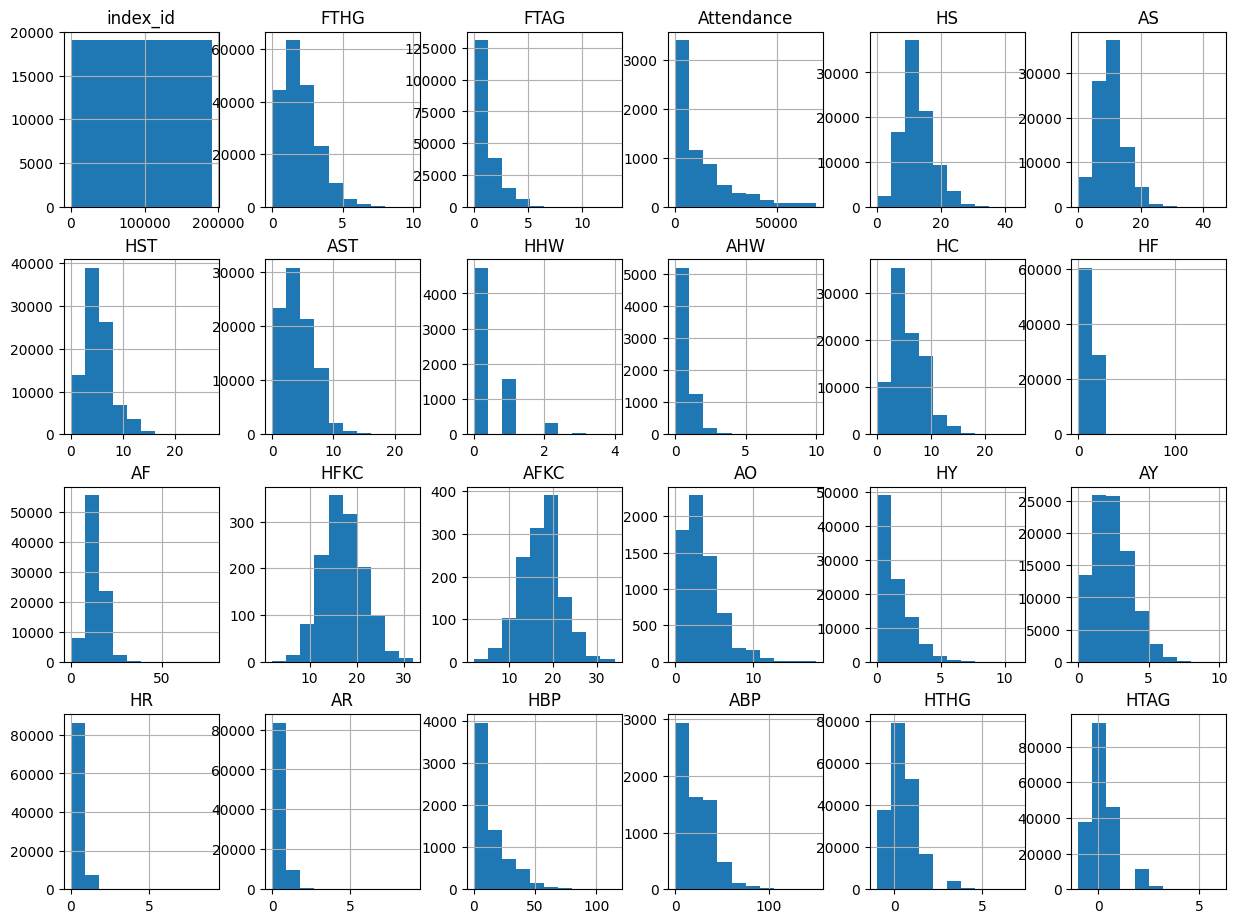

In [19]:
# Plotting distribution of numerical columns
foot_ba_1.hist(layout = (7,6), figsize=(15,20))

foot_ba_ma_pt.show()

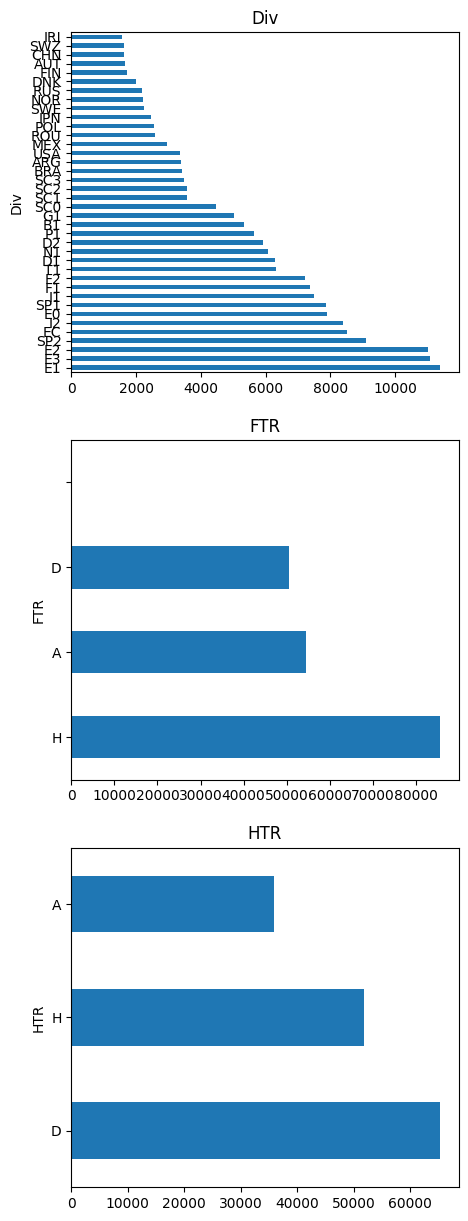

In [20]:
cat_feat = ["Div", "FTR", "HTR"]

fig, ax = foot_ba_ma_pt.subplots(nrows=len(cat_feat), ncols=1, figsize=(5,15))

for i, categorical_feature in enumerate(foot_ba_1[cat_feat]):
    foot_ba_1[categorical_feature].value_counts().plot(kind="barh", ax=ax[i]).set_title(categorical_feature)

fig.show()

At the Half Time, most games are still on Draw, whereas at Full-Time, most games are won by the home team.

Handling Missing Values

In [21]:
display_na_cols(foot_ba_1)

,0
Attendance,183857
Referee,133862
HS,99384
AS,99381
HST,100190
AST,100187
HHW,184018
AHW,184018
HC,99756
HF,101478


In [22]:
foot_ba_1[foot_ba_1.isna().any(axis=1)]

,index_id,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,Attendance,Referee,...,HY,AY,HR,AR,HBP,ABP,HTHG,HTAG,HTR,FTR
0,0,ARG,2021-05-31 00:00:00,23:00,Independiente,Colon Santa FE,0,2,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,A
1,1,ARG,2021-05-31 00:00:00,19:00,Racing Club,Boca Juniors,0,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
2,2,USA,2021-05-31 00:00:00,02:30,Seattle Sounders,Austin FC,0,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
3,3,MEX,2021-05-31 00:00:00,02:15,Cruz Azul,Santos Laguna,1,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
4,4,BRA,2021-05-31 00:00:00,00:30,Internacional,Sport Recife,2,2,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190668,190668,F2,2000-07-29 00:00:00,00:00,Ajaccio,Le Mans,1,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,H,H
190669,190669,SC0,2000-07-29 00:00:00,00:00,St Mirren,Kilmarnock,0,1,7388.0,Willie Young,...,1.0,2.0,0.0,0.0,10.0,20.0,0,0,D,A
190670,190670,F1,2000-07-28 00:00:00,00:00,Paris SG,Strasbourg,3,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,D,H
190671,190671,F1,2000-07-28 00:00:00,00:00,Marseille,Troyes,3,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,H,H


In [23]:
foot_ba_1.value_counts("HTHG", sort=False)

,count
HTHG,
-1,37669
0,79303
1,52364
2,16873
3,3721
4,636
5,96
6,9
7,2


In [24]:
foot_ba_1.value_counts("HTAG", sort=False)

,count
HTAG,
-1,37669
0,93478
1,45873
2,11346
3,1998
4,270
5,36
6,3


In [25]:
foot_ba_1[foot_ba_1[["HS", "AS"]].isna().any(axis=1)]

,index_id,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,Attendance,Referee,...,HY,AY,HR,AR,HBP,ABP,HTHG,HTAG,HTR,FTR
0,0,ARG,2021-05-31 00:00:00,23:00,Independiente,Colon Santa FE,0,2,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,A
1,1,ARG,2021-05-31 00:00:00,19:00,Racing Club,Boca Juniors,0,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
2,2,USA,2021-05-31 00:00:00,02:30,Seattle Sounders,Austin FC,0,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
3,3,MEX,2021-05-31 00:00:00,02:15,Cruz Azul,Santos Laguna,1,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
4,4,BRA,2021-05-31 00:00:00,00:30,Internacional,Sport Recife,2,2,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190667,190667,F2,2000-07-29 00:00:00,00:00,Beauvais,Montpellier,1,3,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,A,A
190668,190668,F2,2000-07-29 00:00:00,00:00,Ajaccio,Le Mans,1,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,H,H
190670,190670,F1,2000-07-28 00:00:00,00:00,Paris SG,Strasbourg,3,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,D,H
190671,190671,F1,2000-07-28 00:00:00,00:00,Marseille,Troyes,3,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,H,H


In [26]:
foot_ba_1.isnull().sum()

,0
index_id,0
Div,0
Date,0
Time,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
Attendance,183857
Referee,133862


In [27]:
foot_ba_1 = foot_ba_1[~foot_ba_1[["HS", "AS", "HY"]].isna().any(axis=1)]

In [28]:
foot_ba_1.isnull().sum()

,0
index_id,0
Div,0
Date,0
Time,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
Attendance,84642
Referee,37250


In [29]:
foot_ba_1.columns

Index(['index_id', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
       'HC', 'HF', 'AF', 'HFKC', 'AFKC', 'AO', 'HY', 'AY', 'HR', 'AR', 'HBP',
       'ABP', 'HTHG', 'HTAG', 'HTR', 'FTR'],
      dtype='object')

In [30]:
foot_ba_1 = foot_ba_1.drop(['HomeTeam','AwayTeam','HBP','ABP','HFKC', 'AFKC', 'AO','HHW', 'AHW','Attendance', 'Referee','Div','index_id','Time'], axis=1)

In [31]:
foot_ba_1.dropna(inplace = True)

In [32]:
foot_ba_1

,Date,FTHG,FTAG,HS,AS,HST,AST,HC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,HTR,FTR
9,2021-05-30 00:00:00,0,2,15.0,10.0,3.0,3.0,7.0,12.0,8.0,0.0,0.0,0.0,0.0,0,0,D,A
10,2021-05-30 00:00:00,0,5,12.0,14.0,0.0,9.0,7.0,16.0,12.0,4.0,0.0,0.0,0.0,0,3,A,A
11,2021-05-30 00:00:00,0,1,23.0,8.0,6.0,5.0,12.0,10.0,8.0,1.0,2.0,0.0,0.0,0,1,A,A
12,2021-05-30 00:00:00,3,0,14.0,9.0,5.0,2.0,7.0,10.0,10.0,0.0,1.0,0.0,0.0,1,0,H,H
13,2021-05-30 00:00:00,2,2,13.0,14.0,5.0,5.0,3.0,6.0,8.0,0.0,3.0,0.0,0.0,1,1,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190649,2000-07-30 00:00:00,0,0,10.0,14.0,5.0,8.0,6.0,18.0,16.0,1.0,4.0,0.0,0.0,0,0,D,D
190650,2000-07-29 00:00:00,2,1,12.0,5.0,8.0,2.0,4.0,8.0,11.0,2.0,0.0,0.0,0.0,0,1,A,H
190659,2000-07-29 00:00:00,0,2,8.0,7.0,5.0,4.0,5.0,14.0,13.0,2.0,2.0,0.0,1.0,0,1,A,A
190665,2000-07-29 00:00:00,0,0,23.0,10.0,8.0,0.0,6.0,9.0,10.0,1.0,3.0,0.0,1.0,0,0,D,D


In [33]:
foot_ba_1['Date'] = foot_ba_pd_s.to_datetime(foot_ba_1['Date'])

H=Home Win, D=Draw, A=Away Win

In [34]:
foot_ba_1['FTR'].value_counts()

,count
FTR,
H,39116
A,25987
D,23275


In [35]:
foot_ba_1.dtypes

,0
Date,datetime64[ns]
FTHG,int64
FTAG,int64
HS,float64
AS,float64
HST,float64
AST,float64
HC,float64
HF,float64
AF,float64


In [36]:
from sklearn.preprocessing import LabelEncoder as foot_ba_le
foot_ba_lab_en = foot_ba_le()

cat_cols = ['FTR', 'HTR']
for col in cat_cols:
    foot_ba_1[col] = foot_ba_lab_en.fit_transform(foot_ba_1[col])

foot_ba_1

,Date,FTHG,FTAG,HS,AS,HST,AST,HC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,HTR,FTR
9,2021-05-30,0,2,15.0,10.0,3.0,3.0,7.0,12.0,8.0,0.0,0.0,0.0,0.0,0,0,1,0
10,2021-05-30,0,5,12.0,14.0,0.0,9.0,7.0,16.0,12.0,4.0,0.0,0.0,0.0,0,3,0,0
11,2021-05-30,0,1,23.0,8.0,6.0,5.0,12.0,10.0,8.0,1.0,2.0,0.0,0.0,0,1,0,0
12,2021-05-30,3,0,14.0,9.0,5.0,2.0,7.0,10.0,10.0,0.0,1.0,0.0,0.0,1,0,2,2
13,2021-05-30,2,2,13.0,14.0,5.0,5.0,3.0,6.0,8.0,0.0,3.0,0.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190649,2000-07-30,0,0,10.0,14.0,5.0,8.0,6.0,18.0,16.0,1.0,4.0,0.0,0.0,0,0,1,1
190650,2000-07-29,2,1,12.0,5.0,8.0,2.0,4.0,8.0,11.0,2.0,0.0,0.0,0.0,0,1,0,2
190659,2000-07-29,0,2,8.0,7.0,5.0,4.0,5.0,14.0,13.0,2.0,2.0,0.0,1.0,0,1,0,0
190665,2000-07-29,0,0,23.0,10.0,8.0,0.0,6.0,9.0,10.0,1.0,3.0,0.0,1.0,0,0,1,1


H=Home Win----> 2,
D=Draw------> 1,
A=Away Win---> 0

In [37]:
foot_ba_1['FTR'].value_counts()

,count
FTR,
2,39116
0,25987
1,23275


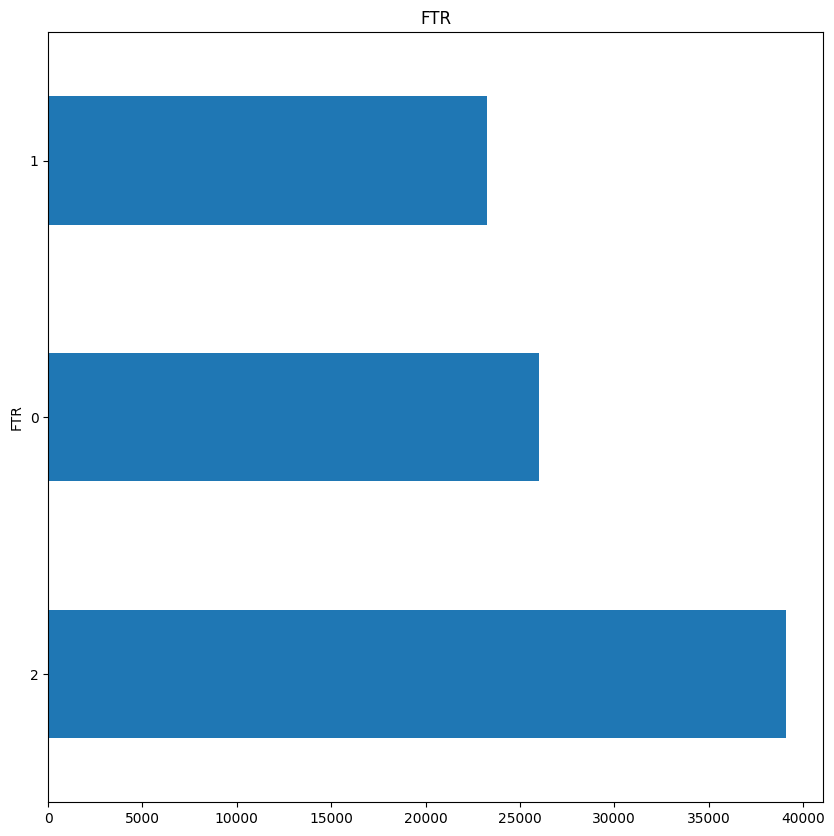

In [38]:
cat_feat = ["FTR"]
fig, ax = foot_ba_ma_pt.subplots(nrows=len(cat_feat), ncols=1, figsize=(10,10))

for i, categorical_feature in enumerate(foot_ba_1[cat_feat]):
    foot_ba_1[categorical_feature].value_counts().plot(kind="barh", ax=ax).set_title(categorical_feature)

fig.show()

In [39]:
foot_ba_1.to_csv('preprocessed_Football_Data.csv', index = False)

In [40]:
import pandas as foot_ba_ads

In [41]:
foot_ba_d_a = foot_ba_ads.read_csv("preprocessed_Football_Data.csv")

In [42]:
foot_ba_d_a

,Date,FTHG,FTAG,HS,AS,HST,AST,HC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,HTR,FTR
0,2021-05-30,0,2,15.0,10.0,3.0,3.0,7.0,12.0,8.0,0.0,0.0,0.0,0.0,0,0,1,0
1,2021-05-30,0,5,12.0,14.0,0.0,9.0,7.0,16.0,12.0,4.0,0.0,0.0,0.0,0,3,0,0
2,2021-05-30,0,1,23.0,8.0,6.0,5.0,12.0,10.0,8.0,1.0,2.0,0.0,0.0,0,1,0,0
3,2021-05-30,3,0,14.0,9.0,5.0,2.0,7.0,10.0,10.0,0.0,1.0,0.0,0.0,1,0,2,2
4,2021-05-30,2,2,13.0,14.0,5.0,5.0,3.0,6.0,8.0,0.0,3.0,0.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88373,2000-07-30,0,0,10.0,14.0,5.0,8.0,6.0,18.0,16.0,1.0,4.0,0.0,0.0,0,0,1,1
88374,2000-07-29,2,1,12.0,5.0,8.0,2.0,4.0,8.0,11.0,2.0,0.0,0.0,0.0,0,1,0,2
88375,2000-07-29,0,2,8.0,7.0,5.0,4.0,5.0,14.0,13.0,2.0,2.0,0.0,1.0,0,1,0,0
88376,2000-07-29,0,0,23.0,10.0,8.0,0.0,6.0,9.0,10.0,1.0,3.0,0.0,1.0,0,0,1,1


In [43]:
foot_ba_d_a.shape

(88378, 18)

In [44]:
foot_ba_d_a['FTR'].value_counts()

,count
FTR,
2,39116
0,25987
1,23275


In [45]:
foot_ba_d_a = foot_ba_d_a[foot_ba_d_a['FTR'] != 2]

In [46]:
foot_ba_d_a['FTR'].value_counts()

,count
FTR,
0,25987
1,23275


In [76]:
foot_ba_d_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49262 entries, 0 to 88377
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    49262 non-null  object 
 1   FTHG    49262 non-null  int64  
 2   FTAG    49262 non-null  int64  
 3   HS      49262 non-null  float64
 4   AS      49262 non-null  float64
 5   HST     49262 non-null  float64
 6   AST     49262 non-null  float64
 7   HC      49262 non-null  float64
 8   HF      49262 non-null  float64
 9   AF      49262 non-null  float64
 10  HY      49262 non-null  float64
 11  AY      49262 non-null  float64
 12  HR      49262 non-null  float64
 13  AR      49262 non-null  float64
 14  HTHG    49262 non-null  int64  
 15  HTAG    49262 non-null  int64  
 16  HTR     49262 non-null  int64  
 17  FTR     49262 non-null  int64  
dtypes: float64(11), int64(6), object(1)
memory usage: 7.1+ MB


In [48]:
import numpy as foot_ba_w_nmp

In [49]:
foot_ba_In = foot_ba_d_a.drop(['FTR','Date'], axis = 1)
display(foot_ba_In)
foot_ba_Op = foot_ba_d_a['FTR']
display(foot_ba_Op)

,FTHG,FTAG,HS,AS,HST,AST,HC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,HTR
0,0,2,15.0,10.0,3.0,3.0,7.0,12.0,8.0,0.0,0.0,0.0,0.0,0,0,1
1,0,5,12.0,14.0,0.0,9.0,7.0,16.0,12.0,4.0,0.0,0.0,0.0,0,3,0
2,0,1,23.0,8.0,6.0,5.0,12.0,10.0,8.0,1.0,2.0,0.0,0.0,0,1,0
4,2,2,13.0,14.0,5.0,5.0,3.0,6.0,8.0,0.0,3.0,0.0,0.0,1,1,1
5,0,2,11.0,14.0,2.0,7.0,4.0,9.0,5.0,1.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88372,1,2,8.0,15.0,4.0,9.0,6.0,17.0,13.0,4.0,1.0,0.0,0.0,0,1,0
88373,0,0,10.0,14.0,5.0,8.0,6.0,18.0,16.0,1.0,4.0,0.0,0.0,0,0,1
88375,0,2,8.0,7.0,5.0,4.0,5.0,14.0,13.0,2.0,2.0,0.0,1.0,0,1,0
88376,0,0,23.0,10.0,8.0,0.0,6.0,9.0,10.0,1.0,3.0,0.0,1.0,0,0,1


,FTR
0,0
1,0
2,0
4,1
5,0
...,...
88372,0
88373,1
88375,0
88376,1


In [50]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler as foot_ba_undrsmp
from collections import Counter as foot_ba_cntr

foot_ba_Op = foot_ba_d_a['FTR']

print('Original Data   :  %s' % foot_ba_cntr(foot_ba_Op))
foot_ba_ovrmod = foot_ba_undrsmp()
foot_ba_In, foot_ba_Op = foot_ba_ovrmod.fit_resample(foot_ba_In, foot_ba_Op)
print('Balanced Data : %s' % foot_ba_cntr(foot_ba_Op))

Original Data   :  Counter({0: 25987, 1: 23275})
Balanced Data : Counter({0: 23275, 1: 23275})


In [51]:
print("Input Data: ",foot_ba_In.shape)
print("Output Data: ",foot_ba_Op.shape)

Input Data:  (46550, 16)
Output Data:  (46550,)


In [52]:
from sklearn.model_selection import train_test_split as foot_ba_split
from tensorflow.keras.layers import LSTM as foot_ba_longstm
from tensorflow.keras.layers import GRU as foot_ba_gru
from tensorflow.keras.models import Sequential as foot_ba_seq
from tensorflow.keras.layers import Dense as foot_ba_dnse
from sklearn.metrics import mean_absolute_error as foot_ba_mae
from sklearn.metrics import mean_squared_error as foot_ba_mse
from sklearn.metrics import r2_score as foot_ba_r2sc
from sklearn.metrics import confusion_matrix as foot_ba_cm
from sklearn.metrics import classification_report as foot_ba_cr
import matplotlib.pyplot as foot_ba_plt
import seaborn as foot_ba_sns
import math as foot_ba_math
import time as foot_ba_time

foot_ba_actvn = 'relu'
foot_ba_loss = 'mean_squared_error'

In [53]:
foot_ba_X_tr, foot_ba_X_ts, foot_ba_y_tr, foot_ba_y_ts = foot_ba_split(foot_ba_In, foot_ba_Op,test_size = 0.4,random_state = 22)

LSTM Implementation

LSTM (Optimizers)

In [54]:
foot_ba_op = ['adam', 'rmsprop', 'adamax']

In [55]:
############### opt= 'adam'

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_longstm(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = 10, batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on LSTM\n")
print("LSTM Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("LSTM Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4999 - loss: 0.3128
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6762 - loss: 0.2134
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7536 - loss: 0.1703
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8072 - loss: 0.1356
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8107 - loss: 0.1321
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.8383 - loss: 0.1172
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8723 - loss: 0.0933
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9113 - loss: 0.0727
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9269 - loss: 0.0615
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9666 - loss: 0.0355
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

 Evaluation of Football Match on LSTM

LSTM Score of R2   : 90.8352895013858
LSTM Score of MAE  : 0.09691648312057063


In [56]:
############### opt= 'rmsprop'

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_longstm(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[1], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = 10, batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on LSTM\n")
print("LSTM Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("LSTM Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.5338 - loss: 0.2548
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6546 - loss: 0.2232
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6760 - loss: 0.2151
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6773 - loss: 0.2123
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6780 - loss: 0.2098
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6856 - loss: 0.2044
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6991 - loss: 0.1957
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.7069 - loss: 0.1955
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7222 - loss: 0.1852
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.7448 - loss: 0.1732
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 Evaluation of Football Match on LSTM

LSTM Score of R2   : 25.51745141513403
LSTM Score of MAE  : 0.35344755818125034

In [57]:
############### opt= 'adamax'

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_longstm(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[2], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = 10, batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on LSTM\n")
print("LSTM Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("LSTM Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.5004 - loss: 0.3647
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5887 - loss: 0.2404
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6678 - loss: 0.2213
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.6879 - loss: 0.2107
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6938 - loss: 0.2022
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7013 - loss: 0.1975
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7062 - loss: 0.1940
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7129 - loss: 0.1893
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7213 - loss: 0.1843
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7245 - loss: 0.1818
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 Evaluation of Football Match on LSTM

LSTM Score of R2   : 31.362156984539034
LSTM Score of MAE  : 0.3494405652215318

LSTM (Epochs)

In [58]:
foot_ba_epo = [25, 35, 45]

In [59]:
############### epoches= 25

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_longstm(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = foot_ba_epo[0], batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on LSTM\n")
print("LSTM Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("LSTM Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5259 - loss: 0.3457
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.6593 - loss: 0.2232
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6846 - loss: 0.2086
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7107 - loss: 0.1918
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7591 - loss: 0.1640
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9411 - loss: 0.0669
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0166
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9979 - loss: 0.0092
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9994 - loss: 0.0040
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9997 - loss: 0.0028
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9995 - l

In [60]:
############### epoches= 35

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_longstm(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = foot_ba_epo[1], batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on LSTM\n")
print("LSTM Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("LSTM Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5176 - loss: 0.2876
Epoch 2/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.6685 - loss: 0.2181
Epoch 3/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6713 - loss: 0.2021
Epoch 4/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7679 - loss: 0.1672
Epoch 5/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8087 - loss: 0.1360
Epoch 6/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8305 - loss: 0.1215
Epoch 7/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8673 - loss: 0.0982
Epoch 8/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8850 - loss: 0.0906
Epoch 9/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9243 - loss: 0.0647
Epoch 10/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9184 - loss: 0.0680
Epoch 11/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9695 - loss: 0.0300
Epoch 12/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9747 - l

In [61]:
############### epoches= 45

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_longstm(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = foot_ba_epo[2], batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on LSTM\n")
print("LSTM Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("LSTM Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("LSTM Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5718 - loss: 0.2554
Epoch 2/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6802 - loss: 0.2128
Epoch 3/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.6945 - loss: 0.2002
Epoch 4/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7112 - loss: 0.1898
Epoch 5/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7455 - loss: 0.1713
Epoch 6/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8411 - loss: 0.1198
Epoch 7/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9026 - loss: 0.0771
Epoch 8/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9187 - loss: 0.0715
Epoch 9/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9708 - loss: 0.0296
Epoch 10/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9707 - loss: 0.0266
Epoch 11/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9673 - loss: 0.0270
Epoch 12/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9915 - l


Classification Report for LSTM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9282
           1       1.00      1.00      1.00      9338

    accuracy                           1.00     18620
   macro avg       1.00      1.00      1.00     18620
weighted avg       1.00      1.00      1.00     18620



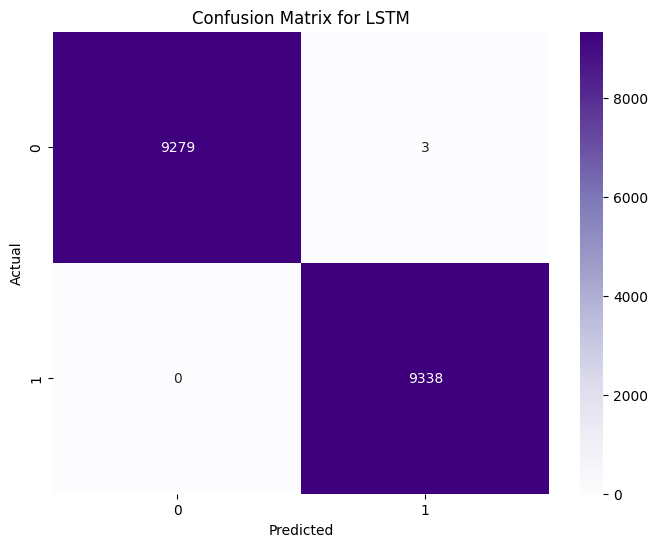

In [62]:
foot_ba_prd_classes = (foot_ba_prd >= 0.5).astype(int)
foot_ba_conf_matrix = foot_ba_cm(foot_ba_y_ts, foot_ba_prd_classes)
foot_ba_class_report = foot_ba_cr(foot_ba_y_ts, foot_ba_prd_classes)
print("\nClassification Report for LSTM:\n", foot_ba_class_report)
foot_ba_plt.figure(figsize=(8, 6))
foot_ba_sns.heatmap(foot_ba_conf_matrix, annot=True, fmt='d', cmap='Purples')
foot_ba_plt.xlabel('Predicted')
foot_ba_plt.ylabel('Actual')
foot_ba_plt.title('Confusion Matrix for LSTM')
foot_ba_plt.show()

GRU Implementation

GRU (Optimizers)

In [63]:
############### opt= 'adam'

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_gru(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = 10, batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on GRU\n")
print("GRU Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("GRU Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5329 - loss: 0.3088
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6766 - loss: 0.2154
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6816 - loss: 0.2105
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6827 - loss: 0.2085
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6861 - loss: 0.2057
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7099 - loss: 0.1905
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8909 - loss: 0.0950
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9885 - loss: 0.0284
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9962 - loss: 0.0129
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9979 - loss: 0.0079
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

 Evaluation of Football Match on GRU

GRU Score of R2   : 92.29929920466809
GRU Score of MAE  : 0.11250167819306206
GR

In [64]:
############### opt= 'rmsprop'

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_gru(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[1], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = 10, batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on GRU\n")
print("GRU Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("GRU Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.5532 - loss: 0.2821
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6817 - loss: 0.2148
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6788 - loss: 0.2071
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.7042 - loss: 0.1947
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7564 - loss: 0.1685
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8646 - loss: 0.1094
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.9585 - loss: 0.0577
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9783 - loss: 0.0361
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9872 - loss: 0.0253
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9920 - loss: 0.0199
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

 Evaluation of Football Match on GRU

GRU Score of R2   : 95.7526881106877
GRU Score of MAE  : 0.06840812250442611
GRU

In [65]:
############### opt= 'adamax'

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_gru(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[2], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = 10, batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on GRU\n")
print("GRU Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("GRU Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.5289 - loss: 0.2931
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6081 - loss: 0.2329
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6720 - loss: 0.2178
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.6851 - loss: 0.2104
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6831 - loss: 0.2089
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6888 - loss: 0.2055
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6823 - loss: 0.2037
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6961 - loss: 0.1959
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7079 - loss: 0.1885
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7353 - loss: 0.1785
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

 Evaluation of Football Match on GRU

GRU Score of R2   : 33.930000195402634
GRU Score of MAE  : 0.3481206742372408
GR

GRU (Epochs)

In [66]:
############### epoches= 25

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_gru(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = foot_ba_epo[0], batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on GRU\n")
print("GRU Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("GRU Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.5295 - loss: 0.2998
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6705 - loss: 0.2173
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.6822 - loss: 0.2110
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6859 - loss: 0.2073
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6984 - loss: 0.1997
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7972 - loss: 0.1444
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9858 - loss: 0.0309
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9919 - loss: 0.0163
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9946 - loss: 0.0118
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.9964 - loss: 0.0078
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9981 - loss: 0.0050
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9983 - l

In [67]:
############### epoches= 35

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_gru(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = foot_ba_epo[1], batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on GRU\n")
print("GRU Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("GRU Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5245 - loss: 0.2871
Epoch 2/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.6724 - loss: 0.2191
Epoch 3/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6834 - loss: 0.2051
Epoch 4/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7647 - loss: 0.1615
Epoch 5/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9838 - loss: 0.0275
Epoch 6/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9948 - loss: 0.0092
Epoch 7/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9970 - loss: 0.0054
Epoch 8/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9984 - loss: 0.0028
Epoch 9/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9984 - loss: 0.0022
Epoch 10/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9990 - loss: 0.0016
Epoch 11/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9993 - loss: 0.0014
Epoch 12/35
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9992 - l

In [68]:
############### epoches= 45

foot_ba_mod = foot_ba_seq()
foot_ba_mod.add(foot_ba_gru(64, input_shape=(None,1), activation=foot_ba_actvn))
foot_ba_mod.add(foot_ba_dnse(1))
foot_ba_mod.compile(loss= foot_ba_loss, optimizer= foot_ba_op[0], metrics=['accuracy'])
foot_ba_hstry = foot_ba_mod.fit(foot_ba_X_tr, foot_ba_y_tr, epochs = foot_ba_epo[2], batch_size = 300)
foot_ba_prd = foot_ba_mod.predict(foot_ba_X_ts)
print("\n Evaluation of Football Match on GRU\n")
print("GRU Score of R2   :", foot_ba_r2sc(foot_ba_y_ts, foot_ba_prd)*100)
print("GRU Score of MAE  :", foot_ba_mae(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of MSE  :", foot_ba_mse(foot_ba_y_ts, foot_ba_prd))
print("GRU Score of RMSE :", foot_ba_math.sqrt(foot_ba_mse(foot_ba_y_ts, foot_ba_prd)))

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.5384 - loss: 0.2802
Epoch 2/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6695 - loss: 0.2191
Epoch 3/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.6832 - loss: 0.2090
Epoch 4/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7567 - loss: 0.1625
Epoch 5/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9547 - loss: 0.0622
Epoch 6/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9921 - loss: 0.0236
Epoch 7/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9982 - loss: 0.0096
Epoch 8/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9993 - loss: 0.0061
Epoch 9/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9998 - loss: 0.0035
Epoch 10/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9998 - loss: 0.0025
Epoch 11/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9999 - loss: 0.0016
Epoch 12/45
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9998 - l


Classification Report for GRU:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9282
           1       1.00      1.00      1.00      9338

    accuracy                           1.00     18620
   macro avg       1.00      1.00      1.00     18620
weighted avg       1.00      1.00      1.00     18620



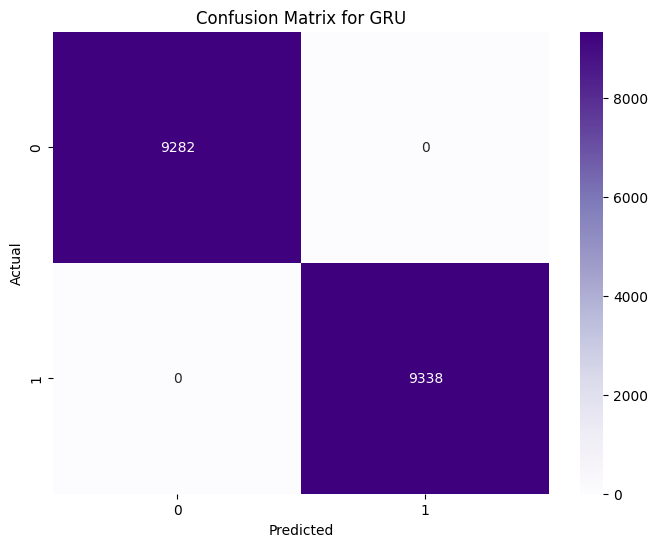

In [69]:
foot_ba_prd_classes = (foot_ba_prd >= 0.5).astype(int)
foot_ba_conf_matrix = foot_ba_cm(foot_ba_y_ts, foot_ba_prd_classes)
foot_ba_class_report = foot_ba_cr(foot_ba_y_ts, foot_ba_prd_classes)
print("\nClassification Report for GRU:\n", foot_ba_class_report)
foot_ba_plt.figure(figsize=(8, 6))
foot_ba_sns.heatmap(foot_ba_conf_matrix, annot=True, fmt='d', cmap='Purples')
foot_ba_plt.xlabel('Predicted')
foot_ba_plt.ylabel('Actual')
foot_ba_plt.title('Confusion Matrix for GRU')
foot_ba_plt.show()

ARIMA Implementation

In [70]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00


In [71]:
from pmdarima import auto_arima as foot_ba_aaa
foot_ba_aaa_M = foot_ba_aaa(foot_ba_Op[:30000])
foot_ba_aaa_M

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

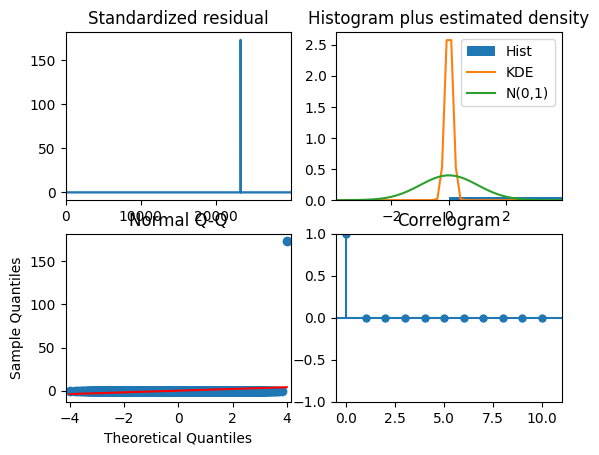

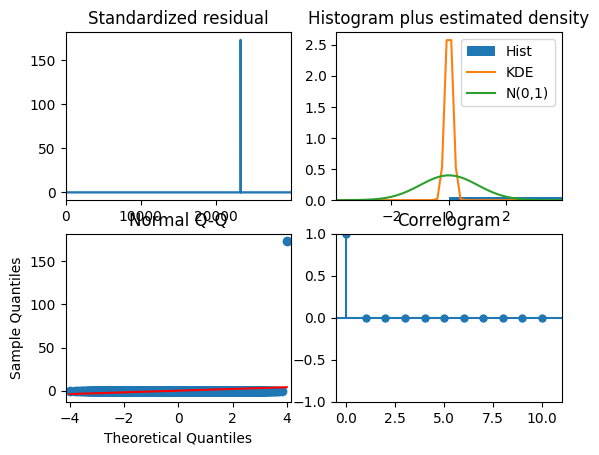

In [72]:
foot_ba_aaa_M.plot_diagnostics()

In [73]:
from statsmodels.tsa.arima.model import ARIMA as foot_ba_ari
ari_model = foot_ba_ari(foot_ba_y_tr, order=(0,1,0))
ari_model = ari_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
ari_pred = ari_model.predict(start=len(foot_ba_y_tr), end=len(foot_ba_y_tr) + len(foot_ba_y_ts) - 1)
ari_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
27930,1.0
27931,1.0
27932,1.0
27933,1.0
27934,1.0
...,...
46545,1.0
46546,1.0
46547,1.0
46548,1.0


In [75]:
print("\nClassification Report for ARIMA:\n", foot_ba_cr(foot_ba_y_ts, ari_pred))


Classification Report for ARIMA:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9282
           1       0.50      1.00      0.67      9338

    accuracy                           0.50     18620
   macro avg       0.25      0.50      0.33     18620
weighted avg       0.25      0.50      0.34     18620



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
